#Presentación

Comisión 1

**Integrantes:**


*   Mateo Rovere - Legajo R-4609/4
*   Ma. Luciana Vinti - Legajo V-3063/5







# Link listing

http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2022-03-29/visualisations/listings.csv

# Link Googlecolab
https://colab.research.google.com/drive/1b9YUZya8txYj6JEd_gY6KJHAkrQQNO7m#scrollTo=IEDRxzrkSAUA

# Problema

Elegir una ciudad y según los datos que brinda Inside Airbnb formular 3 preguntas y responder las mismas analizando datos y finalmente presentar una gráfica.

# La ciudad elegida es: **Tokio**



# Preguntas

1 - Según los tipos de alojamiento que hay en Tokio, ¿cuántos hay de cada uno en cada barrio de Tokio?

2 - ¿Cuál es el promedio de precio de cada barrio de Tokio? ¿Supera el precio promedio de Tokio que nos brinda Inside Airbnb? (15608)

3 - ¿Cuál fue la disponibilidad en los barrios de Tokio en los 365 días?

# Función para cargar el archivo

In [ ]:
def carga_de_archivo(lista):
  """ Esta función carga el archivo que necesitamos para el análisis de datos"""
  
  dicc_general = {}
  import csv
  with open( 'listings.csv') as File:
    reader = csv.reader(File, delimiter=',')
    next (File)
    for row in reader:
        for x in lista:
          if x in dicc_general:
            dicc_general[x].append(row[x])
          else:
            dicc_general[x] = [row[x]]
  return dicc_general

datos = carga_de_archivo([5,8,9,15])

#5 = barrio, 8 = roomtype, 9 = precio, 15 = disponibilidad

# Función para graficar

In [ ]:
def grafico (tipo,eje_y,titulo,p=None):
  """
  Está función nos permite realizar gráficos.
  p = promedio de precio de Tokio
  """
  import csv
  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()
  plt.figure(figsize = (15,8))
  plt.bar(tipo.keys(), tipo.values())
  plt.xticks(rotation = 90, fontsize=15);
  plt.title(titulo,fontsize=20);
  plt.yticks(fontsize=15);
  plt.xlabel('Barrio',fontsize=15)
  plt.ylabel(eje_y,fontsize=15)
  if p != None:
    plt.plot([0,47],[p,p])
  return plt.show()

# Primera Pregunta

**Según los tipos de alojamiento que hay en Tokio, ¿cuántos hay de cada uno en cada barrio de Tokio?** <br>
Esto se consiguió con una función donde se define el tipo de alojamiento, en qué barrio se encuentran y la cantidad que hay en cada barrio.
Luego al gráfico decidimos hacerlo interactivo en el cual el usuario puede elegir cuál de los 4 gráficos desea ver, para eso creamos también una función.


In [ ]:
cantidad_s = 0
cantidad_h = 0
cantidad_p = 0
cantidad_e = 0
private_room = {}
entire_room = {}
hotel_room = {}
shared_room = {}
barrios = datos[5]
tipos = datos[8]

def tipo_y_barrio(tip, donde, cant):
  """ Esta función define el tipo de alojamiento, el barrio y cuántos tipo de alojamiento
  hay en cada barrio"""
  
  for idx in range(len(barrios)):
    tipo = tipos[idx]
    barrio = barrios[idx]
    if tipo == tip:
      if barrio in donde.keys():
        cant += 1
        donde[barrio] = cant
      else:
        cant = 1
        donde[barrio] = cant
  return
tipo_y_barrio("Private room", private_room, cantidad_p)
tipo_y_barrio("Entire home/apt",entire_room, cantidad_e)
tipo_y_barrio("Shared room", shared_room, cantidad_s)
tipo_y_barrio("Hotel room",hotel_room, cantidad_h)

print("Private Room: ",private_room)
print("Hotel Room: ",hotel_room)
print("Shared Room: ", shared_room)
print("Entire Room/apt", entire_room)


In [ ]:
#def tipo_max (diccio):
#  lista=[]
#  i = 0
#  for i in private_room.values():
#    lista.append(i)
#    max(lista)
#  print(max(lista))
  

  

# Gráfico Primer Pregunta

Indique si usted quiere ver el grafico de (Private room), (Hotel room), (Shared room) o  (Entire home)Shared room


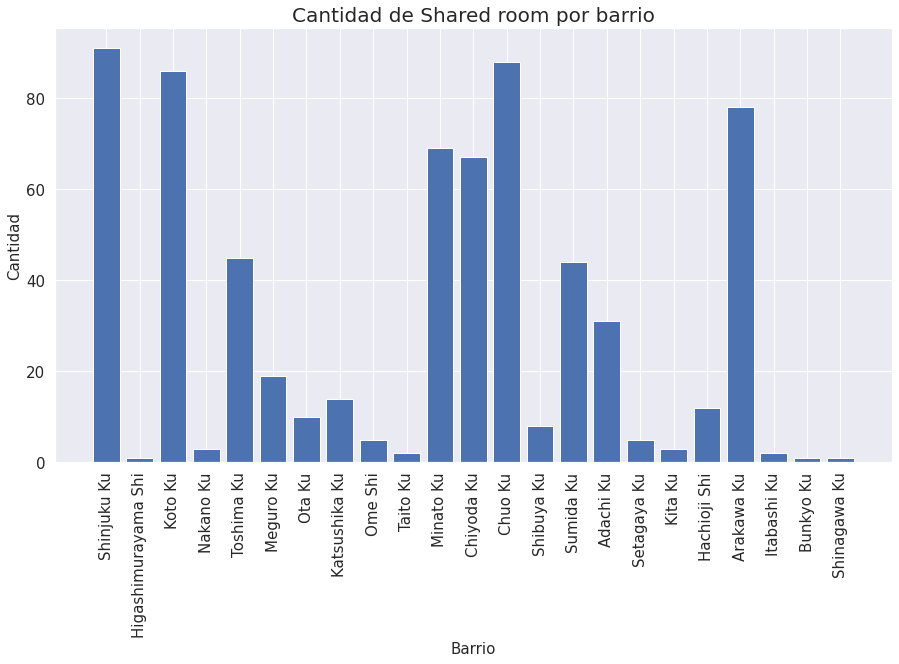

In [ ]:
ingreso = input("Indique si usted quiere ver el grafico de (Private room), (Hotel room), (Shared room) o  (Entire home)")

if ingreso == "Private room":
  grafico(private_room, "Cantidad","Cantidad Private room por barrio")
  tipo_max(private_room)
elif ingreso == "Hotel room":
  grafico(hotel_room, "Cantidad", "Cantidad de Hotel room por barrio")
elif ingreso == "Shared room":
  grafico(shared_room, "Cantidad","Cantidad de Shared room por barrio")
elif ingreso == "Entire home":
  grafico(entire_room, "Cantidad","Cantidad de Entire home por barrio")
else:
  print("input erroneo, intente nuevamente") 


# Segunda Pregunta

**¿Cuál es el promedio de precio de cada barrio de Tokio? ¿Supera el precio promedio de Tokio que nos brinda Inside Airbnb? (15608)** <br>
Esto lo logramos con una función que también sirve para la pregunta número 3, donde si le damos un valor a x nos devuelve el promedio de precios por barrio y si le damos otroa valor a x y un valor a k nos devuelve el porcentaje de disponibilidad que hubo en 365 días.

Hicimos 2 gráficos ya que en el primero se muestra un valor atípico, el cual no permite ver correctamente la gráfica y excluyéndolo podemos analizar mejor los datos.

A su vez hay una línea en los gráficos que es el precio promedio de Tokio, extraído de Inside Airbnb (15608), donde podemos detectar si superan o no el mismo.

In [ ]:
def precio_dispo_por_barrio(x, lista , dicc, k=None):
  """Esta función se utiliza para sacar el promedio de los precios por barrio si le damos valor a x (9)
 pero si a x le damos valor 15 y un valor a k calculamos el porcentaje de disponibilidad"""

  #k = porcentaje, si no le agregas un valor calcula el promedio 
  #x = fila que elegimos ver (9 es el precio,  15 es la disponibilidad)
  #lista = lista vacía
  #dicc = diccionario vacío donde se van sumando los valores de cada barrio
  suma = 0
  cantidad = 0
  dicc_pod_prom_barrio = {}
  import csv 
  with open( 'listings.csv') as File:
      reader = csv.reader(File, delimiter=',')
      for row in reader:
        if row[5] == 'neighbourhood':
          continue
        else:
          barrio = row[5]
          a=int(row[x])
          suma += int(a)
          cantidad += 1
          lista.append(a)
          if barrio in dicc.keys():
            dicc[barrio].append(a)
          else:
            dicc[barrio]= [a]
  
  for x in dicc:
    total_barrio = sum(dicc[x])
    cant_barrio = len(dicc[x])
    if k != None:
      prom_barrio = ((total_barrio/cant_barrio)/365)*100
      dicc_pod_prom_barrio[x] = round(prom_barrio,2)
    else:
      prom_barrio = total_barrio/cant_barrio
      dicc_pod_prom_barrio[x] = round(prom_barrio,2)
  return dicc_pod_prom_barrio



# Gráfico Segunda Pregunta

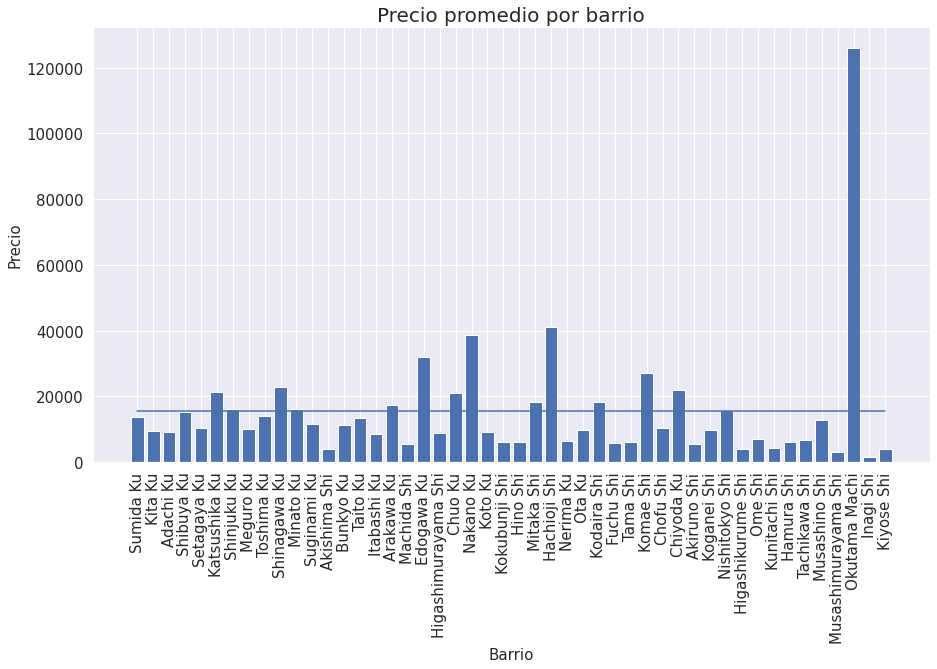

In [ ]:
precios = []
precios_por_barrio = {}
grafico(precio_dispo_por_barrio(9, precios , precios_por_barrio), "Precio", "Precio promedio por barrio",15608)

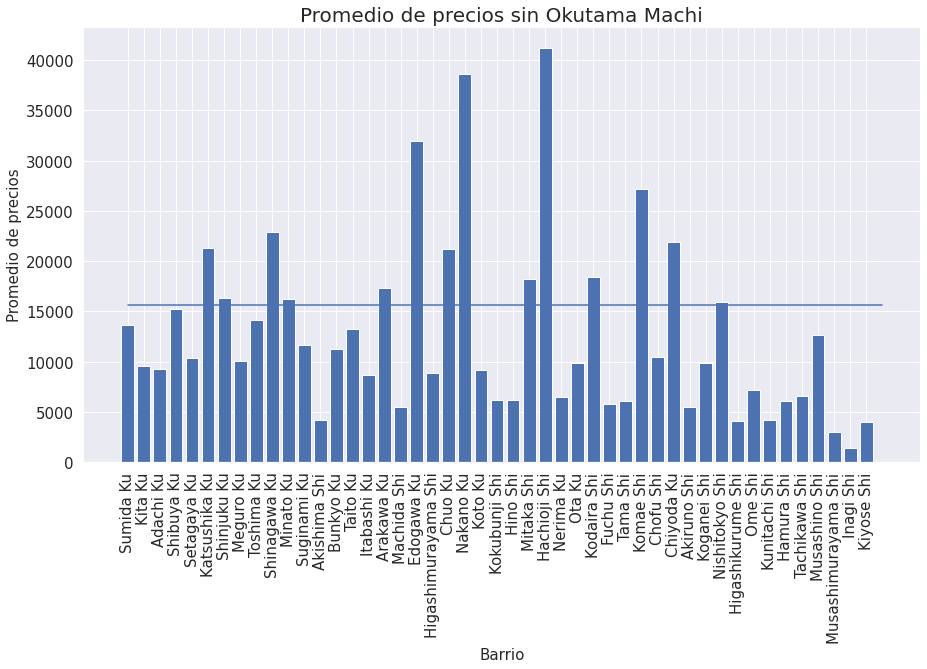

In [ ]:
#Gráfico sin Okutama Machi porque tiene un sólo valor y es elevado
#y no nos deja observar bien el gráfico. Es un valor atípico.

sin_okutama_machi = {}
sin_okutama_machi = precio_dispo_por_barrio(9, precios , precios_por_barrio).copy()
try:
  del sin_okutama_machi["Okutama Machi"]
except KeyError:
  print("KeyError")
  pass  
grafico(sin_okutama_machi,"Promedio de precios","Promedio de precios sin Okutama Machi",15608)

# Tercera Pregunta

**¿Cuál fue la disponibilidad en los barrios de Tokio en los 365 días?** <br>
El concepto de esta pregunta es bastante similar a la pregunta dos, por lo cual utilizamos la función de la de la misma pero en ésta se tiene en cuenta la disponibilidad por barrio en vez de los precios por barrio y también en el anterior gráfico se calcula un promedio y en este para esa misma variable se calcula un porcentaje anual.

In [ ]:
lista_dispo = []
disponibilidad_por_barrio = {}
precio_dispo_por_barrio(15, lista_dispo , disponibilidad_por_barrio ,"random")
menor = min(precio_dispo_por_barrio(15, lista_dispo , disponibilidad_por_barrio ,"random").values())
#print(menor)
#print(disponibilidad_por_barrio)
for x,y in precio_dispo_por_barrio(15, lista_dispo , disponibilidad_por_barrio ,"random").items():
  if y == menor:
    #c = precio_dispo_por_barrio(15, lista_dispo , disponibilidad_por_barrio ,"random").itmes()
    #print(disponibilidad_por_barrio[c])
    print(disponibilidad_por_barrio[x],x)

[26, 26, 57, 26, 26, 57, 26, 26, 57] Musashimurayama Shi


# Gráfico Tercer Pregunta

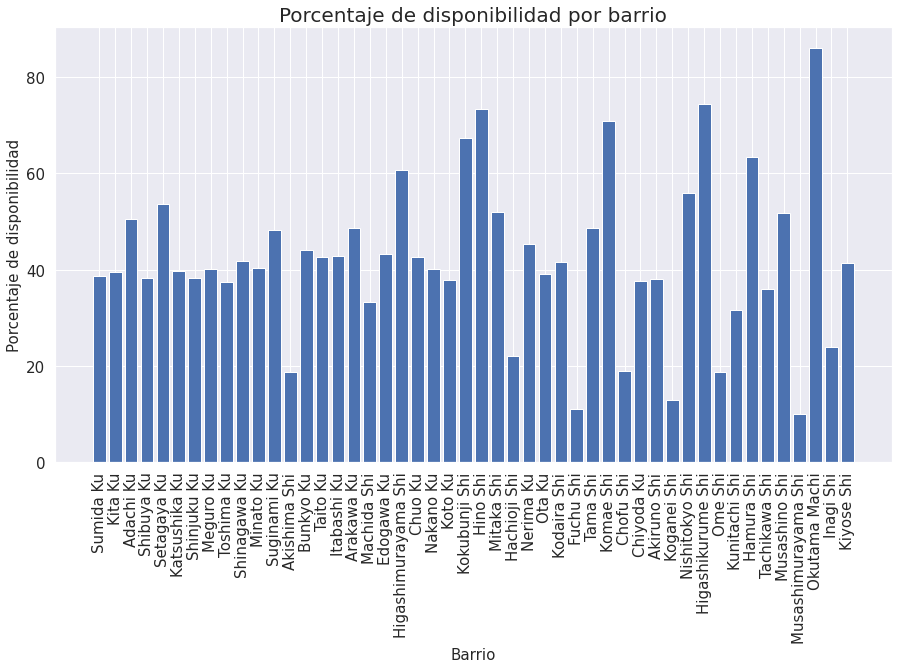

In [ ]:
grafico(precio_dispo_por_barrio(15, lista_dispo , disponibilidad_por_barrio ,"random"),'Porcentaje de disponibilidad',"Porcentaje de disponibilidad por barrio")